In [203]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "/Users/danielchoy1314/Downloads/as-733"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def random_probing(current_graph) :
    picked_node = random.choice(list(current_graph.nodes()))
    return picked_node

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [204]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "/Users/danielchoy1314/Downloads/as-733/" + list_of_file[i]  
    
# print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))

K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node = random_probing(g)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
    
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


Loading…:   0%|                          | 1/732 [00:05<1:05:36,  5.38s/it]

True


Loading…:   0%|                          | 2/732 [00:10<1:04:34,  5.31s/it]

True


Loading…:   0%|                          | 3/732 [00:15<1:04:13,  5.29s/it]

True


Loading…:   1%|▏                         | 4/732 [00:20<1:03:53,  5.27s/it]

True


Loading…:   1%|▏                         | 5/732 [00:25<1:01:57,  5.11s/it]

True


Loading…:   1%|▏                         | 6/732 [00:31<1:02:36,  5.17s/it]

True


Loading…:   1%|▏                         | 7/732 [00:36<1:02:51,  5.20s/it]

True


Loading…:   1%|▎                         | 8/732 [00:41<1:03:21,  5.25s/it]

True


Loading…:   1%|▎                         | 9/732 [00:46<1:03:23,  5.26s/it]

True


Loading…:   1%|▎                        | 10/732 [00:52<1:03:10,  5.25s/it]

True


Loading…:   2%|▍                        | 11/732 [00:57<1:03:01,  5.24s/it]

True


Loading…:   2%|▍                        | 12/732 [01:02<1:03:23,  5.28s/it]

True


Loading…:   2%|▍                        | 13/732 [01:09<1:07:20,  5.62s/it]

True


Loading…:   2%|▍                        | 14/732 [01:14<1:06:15,  5.54s/it]

True


Loading…:   2%|▌                        | 15/732 [01:19<1:05:18,  5.47s/it]

True


Loading…:   2%|▌                        | 16/732 [01:26<1:08:20,  5.73s/it]

True


Loading…:   2%|▌                        | 17/732 [01:33<1:12:39,  6.10s/it]

True


Loading…:   2%|▌                        | 18/732 [01:40<1:15:22,  6.33s/it]

True


Loading…:   3%|▋                        | 19/732 [01:47<1:17:52,  6.55s/it]

True


Loading…:   3%|▋                        | 20/732 [01:53<1:17:03,  6.49s/it]

True


Loading…:   3%|▋                        | 21/732 [02:00<1:18:31,  6.63s/it]

True


Loading…:   3%|▊                        | 22/732 [02:06<1:17:32,  6.55s/it]

True


Loading…:   3%|▊                        | 23/732 [02:13<1:17:52,  6.59s/it]

True


Loading…:   3%|▊                        | 24/732 [02:19<1:15:47,  6.42s/it]

True


Loading…:   3%|▊                        | 25/732 [02:26<1:16:25,  6.49s/it]

True


Loading…:   4%|▉                        | 26/732 [02:32<1:16:19,  6.49s/it]

True


Loading…:   4%|▉                        | 27/732 [02:38<1:14:56,  6.38s/it]

True


Loading…:   4%|▉                        | 28/732 [02:45<1:17:06,  6.57s/it]

True


Loading…:   4%|▉                        | 29/732 [02:52<1:18:41,  6.72s/it]

True


Loading…:   4%|█                        | 30/732 [02:58<1:16:27,  6.54s/it]

True


Loading…:   4%|█                        | 31/732 [03:05<1:16:48,  6.57s/it]

True


Loading…:   4%|█                        | 32/732 [03:11<1:16:03,  6.52s/it]

True


Loading…:   5%|█▏                       | 33/732 [03:18<1:15:33,  6.49s/it]

True


Loading…:   5%|█▏                       | 34/732 [03:24<1:15:26,  6.48s/it]

True


Loading…:   5%|█▏                       | 35/732 [03:31<1:16:54,  6.62s/it]

True


Loading…:   5%|█▏                       | 36/732 [03:39<1:19:05,  6.82s/it]

True


Loading…:   5%|█▎                       | 37/732 [03:46<1:20:26,  6.95s/it]

True


Loading…:   5%|█▎                       | 38/732 [03:53<1:20:49,  6.99s/it]

True


Loading…:   5%|█▎                       | 39/732 [04:00<1:19:34,  6.89s/it]

True


Loading…:   5%|█▎                       | 40/732 [04:07<1:20:17,  6.96s/it]

True


Loading…:   6%|█▍                       | 41/732 [04:13<1:16:54,  6.68s/it]

True


Loading…:   6%|█▍                       | 42/732 [04:19<1:15:02,  6.52s/it]

True


Loading…:   6%|█▍                       | 43/732 [04:26<1:16:25,  6.66s/it]

True


Loading…:   6%|█▌                       | 44/732 [04:33<1:16:45,  6.69s/it]

True


Loading…:   6%|█▌                       | 45/732 [04:40<1:17:36,  6.78s/it]

True


Loading…:   6%|█▌                       | 46/732 [04:47<1:18:34,  6.87s/it]

True


Loading…:   6%|█▌                       | 47/732 [04:54<1:20:51,  7.08s/it]

True


Loading…:   7%|█▋                       | 48/732 [05:02<1:22:06,  7.20s/it]

True


Loading…:   7%|█▋                       | 49/732 [05:09<1:21:40,  7.17s/it]

True


Loading…:   7%|█▋                       | 50/732 [05:16<1:19:52,  7.03s/it]

True


Loading…:   7%|█▋                       | 51/732 [05:22<1:18:03,  6.88s/it]

True


Loading…:   7%|█▊                       | 52/732 [05:29<1:17:06,  6.80s/it]

True


Loading…:   7%|█▊                       | 53/732 [05:35<1:14:15,  6.56s/it]

True


Loading…:   7%|█▊                       | 54/732 [05:41<1:14:13,  6.57s/it]

True


Loading…:   8%|█▉                       | 55/732 [05:48<1:14:50,  6.63s/it]

True


Loading…:   8%|█▉                       | 56/732 [05:55<1:15:25,  6.70s/it]

True


Loading…:   8%|█▉                       | 57/732 [06:02<1:15:59,  6.75s/it]

True


Loading…:   8%|█▉                       | 58/732 [06:09<1:17:17,  6.88s/it]

True


Loading…:   8%|██                       | 59/732 [06:16<1:17:32,  6.91s/it]

True


Loading…:   8%|██                       | 60/732 [06:23<1:17:10,  6.89s/it]

True


Loading…:   8%|██                       | 61/732 [06:29<1:15:39,  6.76s/it]

True


Loading…:   8%|██                       | 62/732 [06:36<1:15:18,  6.74s/it]

True


Loading…:   9%|██▏                      | 63/732 [06:43<1:15:40,  6.79s/it]

True


Loading…:   9%|██▏                      | 64/732 [06:49<1:14:06,  6.66s/it]

True


Loading…:   9%|██▏                      | 65/732 [06:56<1:14:59,  6.75s/it]

True


Loading…:   9%|██▎                      | 66/732 [07:03<1:14:19,  6.70s/it]

True


Loading…:   9%|██▎                      | 67/732 [07:09<1:12:53,  6.58s/it]

True


Loading…:   9%|██▎                      | 68/732 [07:16<1:13:28,  6.64s/it]

True


Loading…:   9%|██▎                      | 69/732 [07:23<1:15:49,  6.86s/it]

True


Loading…:  10%|██▍                      | 70/732 [07:30<1:14:33,  6.76s/it]

True


Loading…:  10%|██▍                      | 71/732 [07:36<1:14:08,  6.73s/it]

True


Loading…:  10%|██▍                      | 72/732 [07:44<1:17:08,  7.01s/it]

True


Loading…:  10%|██▍                      | 73/732 [07:51<1:16:31,  6.97s/it]

True


Loading…:  10%|██▌                      | 74/732 [07:57<1:12:53,  6.65s/it]

True


Loading…:  10%|██▌                      | 75/732 [08:03<1:10:23,  6.43s/it]

True


Loading…:  10%|██▌                      | 76/732 [08:09<1:10:11,  6.42s/it]

True


Loading…:  11%|██▋                      | 77/732 [08:17<1:13:19,  6.72s/it]

True


Loading…:  11%|██▋                      | 78/732 [08:23<1:13:14,  6.72s/it]

True


Loading…:  11%|██▋                      | 79/732 [08:30<1:13:28,  6.75s/it]

True


Loading…:  11%|██▋                      | 80/732 [08:37<1:14:51,  6.89s/it]

True


Loading…:  11%|██▊                      | 81/732 [08:44<1:14:47,  6.89s/it]

True


Loading…:  11%|██▊                      | 82/732 [08:51<1:13:08,  6.75s/it]

True


Loading…:  11%|██▊                      | 83/732 [08:57<1:13:12,  6.77s/it]

True


Loading…:  11%|██▊                      | 84/732 [09:03<1:09:55,  6.47s/it]

True


Loading…:  12%|██▉                      | 85/732 [09:09<1:06:58,  6.21s/it]

True


Loading…:  12%|██▉                      | 86/732 [09:14<1:05:11,  6.05s/it]

True


Loading…:  12%|██▉                      | 87/732 [09:21<1:05:09,  6.06s/it]

True


Loading…:  12%|███                      | 88/732 [09:27<1:05:21,  6.09s/it]

True


Loading…:  12%|███                      | 89/732 [09:33<1:07:00,  6.25s/it]

True


Loading…:  12%|███                      | 90/732 [09:40<1:07:34,  6.32s/it]

True


Loading…:  12%|███                      | 91/732 [09:46<1:07:26,  6.31s/it]

True


Loading…:  13%|███▏                     | 92/732 [09:53<1:10:21,  6.60s/it]

True


Loading…:  13%|███▏                     | 93/732 [09:59<1:08:15,  6.41s/it]

True


Loading…:  13%|███▏                     | 94/732 [10:05<1:06:49,  6.28s/it]

True


Loading…:  13%|███▏                     | 95/732 [10:12<1:07:00,  6.31s/it]

True


Loading…:  13%|███▎                     | 96/732 [10:18<1:06:00,  6.23s/it]

True


Loading…:  13%|███▎                     | 97/732 [10:24<1:06:52,  6.32s/it]

True


Loading…:  13%|███▎                     | 98/732 [10:31<1:07:23,  6.38s/it]

True


Loading…:  14%|███▍                     | 99/732 [10:37<1:05:14,  6.18s/it]

True


Loading…:  14%|███▎                    | 100/732 [10:43<1:05:24,  6.21s/it]

True


Loading…:  14%|███▎                    | 101/732 [10:49<1:04:25,  6.13s/it]

True


Loading…:  14%|███▎                    | 102/732 [10:54<1:02:41,  5.97s/it]

True


Loading…:  14%|███▍                    | 103/732 [11:01<1:03:53,  6.09s/it]

True


Loading…:  14%|███▍                    | 104/732 [11:07<1:03:55,  6.11s/it]

True


Loading…:  14%|███▍                    | 105/732 [11:14<1:06:53,  6.40s/it]

True


Loading…:  14%|███▍                    | 106/732 [11:20<1:05:21,  6.26s/it]

True


Loading…:  15%|███▌                    | 107/732 [11:26<1:05:28,  6.29s/it]

True


Loading…:  15%|███▌                    | 108/732 [11:33<1:06:50,  6.43s/it]

True


Loading…:  15%|███▌                    | 109/732 [11:40<1:08:20,  6.58s/it]

True


Loading…:  15%|███▌                    | 110/732 [11:46<1:07:32,  6.52s/it]

True


Loading…:  15%|███▋                    | 111/732 [11:52<1:05:59,  6.38s/it]

True


Loading…:  15%|███▋                    | 112/732 [11:59<1:05:23,  6.33s/it]

True


Loading…:  15%|███▋                    | 113/732 [12:04<1:03:17,  6.13s/it]

True


Loading…:  16%|███▋                    | 114/732 [12:10<1:02:14,  6.04s/it]

True


Loading…:  16%|███▊                    | 115/732 [12:16<1:00:35,  5.89s/it]

True


Loading…:  16%|████                      | 116/732 [12:21<59:02,  5.75s/it]

True


Loading…:  16%|████▏                     | 117/732 [12:26<58:00,  5.66s/it]

True


Loading…:  16%|████▏                     | 118/732 [12:32<57:24,  5.61s/it]

True


Loading…:  16%|████▏                     | 119/732 [12:38<58:33,  5.73s/it]

True


Loading…:  16%|████▎                     | 120/732 [12:44<58:18,  5.72s/it]

True


Loading…:  17%|████▎                     | 121/732 [12:49<58:22,  5.73s/it]

True


Loading…:  17%|████▎                     | 122/732 [12:55<58:21,  5.74s/it]

True


Loading…:  17%|████▎                     | 123/732 [13:01<58:17,  5.74s/it]

True


Loading…:  17%|████▍                     | 124/732 [13:07<58:12,  5.74s/it]

True


Loading…:  17%|████                    | 125/732 [13:13<1:00:17,  5.96s/it]

True


Loading…:  17%|████▏                   | 126/732 [13:21<1:05:56,  6.53s/it]

True


Loading…:  17%|████▏                   | 127/732 [13:29<1:09:38,  6.91s/it]

True


Loading…:  17%|████▏                   | 128/732 [13:36<1:10:12,  6.97s/it]

True


Loading…:  18%|████▏                   | 129/732 [13:42<1:07:02,  6.67s/it]

True


Loading…:  18%|████▎                   | 130/732 [13:48<1:06:24,  6.62s/it]

True


Loading…:  18%|████▎                   | 131/732 [13:56<1:10:05,  7.00s/it]

True


Loading…:  18%|████▎                   | 132/732 [14:04<1:12:08,  7.21s/it]

True


Loading…:  18%|████▎                   | 133/732 [14:12<1:15:04,  7.52s/it]

True


Loading…:  18%|████▍                   | 134/732 [14:20<1:17:06,  7.74s/it]

True


Loading…:  18%|████▍                   | 135/732 [14:27<1:13:18,  7.37s/it]

True


Loading…:  19%|████▍                   | 136/732 [14:34<1:13:38,  7.41s/it]

True


Loading…:  19%|████▍                   | 137/732 [14:41<1:11:32,  7.21s/it]

True


Loading…:  19%|████▌                   | 138/732 [14:47<1:07:35,  6.83s/it]

True


Loading…:  19%|████▌                   | 139/732 [14:53<1:05:10,  6.59s/it]

True


Loading…:  19%|████▌                   | 140/732 [15:00<1:04:53,  6.58s/it]

True


Loading…:  19%|████▌                   | 141/732 [15:06<1:03:20,  6.43s/it]

True


Loading…:  19%|████▋                   | 142/732 [15:12<1:01:51,  6.29s/it]

True


Loading…:  20%|████▋                   | 143/732 [15:19<1:03:22,  6.46s/it]

True


Loading…:  20%|████▋                   | 144/732 [15:26<1:04:29,  6.58s/it]

True


Loading…:  20%|████▊                   | 145/732 [15:34<1:09:35,  7.11s/it]

True


Loading…:  20%|████▊                   | 146/732 [15:42<1:12:25,  7.42s/it]

True


Loading…:  20%|████▊                   | 147/732 [15:50<1:14:36,  7.65s/it]

True


Loading…:  20%|████▊                   | 148/732 [15:58<1:13:43,  7.57s/it]

True


Loading…:  20%|████▉                   | 149/732 [16:05<1:14:04,  7.62s/it]

True


Loading…:  20%|████▉                   | 150/732 [16:13<1:14:07,  7.64s/it]

True


Loading…:  21%|████▉                   | 151/732 [16:21<1:13:56,  7.64s/it]

True


Loading…:  21%|████▉                   | 152/732 [16:28<1:13:36,  7.61s/it]

True


Loading…:  21%|█████                   | 153/732 [16:36<1:13:53,  7.66s/it]

True


Loading…:  21%|█████                   | 154/732 [16:44<1:14:00,  7.68s/it]

True


Loading…:  21%|█████                   | 155/732 [16:51<1:13:55,  7.69s/it]

True


Loading…:  21%|█████                   | 156/732 [16:59<1:13:18,  7.64s/it]

True


Loading…:  21%|█████▏                  | 157/732 [17:07<1:14:24,  7.76s/it]

True


Loading…:  22%|█████▏                  | 158/732 [17:15<1:14:33,  7.79s/it]

True


Loading…:  22%|█████▏                  | 159/732 [17:22<1:13:22,  7.68s/it]

True


Loading…:  22%|█████▏                  | 160/732 [17:30<1:12:28,  7.60s/it]

True


Loading…:  22%|█████▎                  | 161/732 [17:37<1:11:48,  7.54s/it]

True


Loading…:  22%|█████▎                  | 162/732 [17:45<1:11:44,  7.55s/it]

True


Loading…:  22%|█████▎                  | 163/732 [17:52<1:11:48,  7.57s/it]

True


Loading…:  22%|█████▍                  | 164/732 [18:00<1:11:50,  7.59s/it]

True


Loading…:  23%|█████▍                  | 165/732 [18:08<1:12:04,  7.63s/it]

True


Loading…:  23%|█████▍                  | 166/732 [18:15<1:12:33,  7.69s/it]

True


Loading…:  23%|█████▍                  | 167/732 [18:23<1:12:48,  7.73s/it]

True


Loading…:  23%|█████▌                  | 168/732 [18:31<1:12:52,  7.75s/it]

True


Loading…:  23%|█████▌                  | 169/732 [18:39<1:12:59,  7.78s/it]

True


Loading…:  23%|█████▌                  | 170/732 [18:47<1:13:03,  7.80s/it]

True


Loading…:  23%|█████▌                  | 171/732 [18:55<1:13:15,  7.83s/it]

True


Loading…:  23%|█████▋                  | 172/732 [19:03<1:13:54,  7.92s/it]

True


Loading…:  24%|█████▋                  | 173/732 [19:11<1:14:01,  7.95s/it]

True


Loading…:  24%|█████▋                  | 174/732 [19:19<1:14:14,  7.98s/it]

True


Loading…:  24%|█████▋                  | 175/732 [19:27<1:14:22,  8.01s/it]

True


Loading…:  24%|█████▊                  | 176/732 [19:35<1:14:31,  8.04s/it]

True


Loading…:  24%|█████▊                  | 177/732 [19:43<1:14:28,  8.05s/it]

True


Loading…:  24%|█████▊                  | 178/732 [19:51<1:14:08,  8.03s/it]

True


Loading…:  24%|█████▊                  | 179/732 [20:00<1:16:58,  8.35s/it]

True


Loading…:  25%|█████▉                  | 180/732 [20:09<1:17:29,  8.42s/it]

True


Loading…:  25%|█████▉                  | 181/732 [20:17<1:17:09,  8.40s/it]

True


Loading…:  25%|█████▉                  | 182/732 [20:26<1:17:03,  8.41s/it]

True


Loading…:  25%|██████                  | 183/732 [20:36<1:21:01,  8.86s/it]

True


Loading…:  25%|██████                  | 184/732 [20:44<1:19:03,  8.66s/it]

True


Loading…:  25%|██████                  | 185/732 [20:52<1:18:23,  8.60s/it]

True


Loading…:  25%|██████                  | 186/732 [21:01<1:19:02,  8.69s/it]

True


Loading…:  26%|██████▏                 | 187/732 [21:11<1:23:31,  9.20s/it]

True


Loading…:  26%|██████▏                 | 188/732 [21:21<1:23:17,  9.19s/it]

True


Loading…:  26%|██████▏                 | 189/732 [21:30<1:23:32,  9.23s/it]

True


Loading…:  26%|██████▏                 | 190/732 [21:38<1:19:02,  8.75s/it]

True


Loading…:  26%|██████▎                 | 191/732 [21:47<1:20:29,  8.93s/it]

True


Loading…:  26%|██████▎                 | 192/732 [21:56<1:21:40,  9.08s/it]

True


Loading…:  26%|██████▎                 | 193/732 [22:05<1:21:39,  9.09s/it]

True


Loading…:  27%|██████▎                 | 194/732 [22:14<1:19:47,  8.90s/it]

True


Loading…:  27%|██████▍                 | 195/732 [22:22<1:18:04,  8.72s/it]

True


Loading…:  27%|██████▍                 | 196/732 [22:31<1:16:58,  8.62s/it]

True


Loading…:  27%|██████▍                 | 197/732 [22:39<1:16:19,  8.56s/it]

True


Loading…:  27%|██████▍                 | 198/732 [22:47<1:15:50,  8.52s/it]

True


Loading…:  27%|██████▌                 | 199/732 [22:56<1:15:24,  8.49s/it]

True


Loading…:  27%|██████▌                 | 200/732 [23:04<1:14:57,  8.45s/it]

True


Loading…:  27%|██████▌                 | 201/732 [23:13<1:14:51,  8.46s/it]

True


Loading…:  28%|██████▌                 | 202/732 [23:21<1:13:58,  8.38s/it]

True


Loading…:  28%|██████▋                 | 203/732 [23:29<1:13:30,  8.34s/it]

True


Loading…:  28%|██████▋                 | 204/732 [23:38<1:14:00,  8.41s/it]

True


Loading…:  28%|██████▋                 | 205/732 [23:46<1:13:45,  8.40s/it]

True


Loading…:  28%|██████▊                 | 206/732 [23:55<1:13:41,  8.41s/it]

True


Loading…:  28%|██████▊                 | 207/732 [24:03<1:13:54,  8.45s/it]

True


Loading…:  28%|██████▊                 | 208/732 [24:12<1:14:14,  8.50s/it]

True


Loading…:  29%|██████▊                 | 209/732 [24:20<1:13:42,  8.46s/it]

True


Loading…:  29%|██████▉                 | 210/732 [24:28<1:12:28,  8.33s/it]

True


Loading…:  29%|██████▉                 | 211/732 [24:36<1:11:49,  8.27s/it]

True


Loading…:  29%|██████▉                 | 212/732 [24:44<1:11:27,  8.24s/it]

True


Loading…:  29%|██████▉                 | 213/732 [24:53<1:11:33,  8.27s/it]

True


Loading…:  29%|███████                 | 214/732 [25:01<1:11:27,  8.28s/it]

True


Loading…:  29%|███████                 | 215/732 [25:09<1:11:46,  8.33s/it]

True


Loading…:  30%|███████                 | 216/732 [25:18<1:12:23,  8.42s/it]

True


Loading…:  30%|███████                 | 217/732 [25:27<1:12:41,  8.47s/it]

True


Loading…:  30%|███████▏                | 218/732 [25:35<1:12:48,  8.50s/it]

True


Loading…:  30%|███████▏                | 219/732 [25:44<1:13:05,  8.55s/it]

True


Loading…:  30%|███████▏                | 220/732 [25:53<1:15:17,  8.82s/it]

True


Loading…:  30%|███████▏                | 221/732 [26:03<1:16:01,  8.93s/it]

True


Loading…:  30%|███████▎                | 222/732 [26:12<1:16:10,  8.96s/it]

True


Loading…:  30%|███████▎                | 223/732 [26:22<1:18:32,  9.26s/it]

True


Loading…:  31%|███████▎                | 224/732 [26:31<1:18:36,  9.28s/it]

True


Loading…:  31%|███████▍                | 225/732 [26:41<1:20:46,  9.56s/it]

True


Loading…:  31%|███████▍                | 226/732 [26:50<1:19:15,  9.40s/it]

True


Loading…:  31%|███████▍                | 227/732 [27:00<1:19:28,  9.44s/it]

True


Loading…:  31%|███████▍                | 228/732 [27:09<1:18:52,  9.39s/it]

True


Loading…:  31%|███████▌                | 229/732 [27:18<1:19:00,  9.42s/it]

True


Loading…:  31%|███████▌                | 230/732 [27:28<1:18:45,  9.41s/it]

True


Loading…:  32%|███████▌                | 231/732 [27:36<1:16:32,  9.17s/it]

True


Loading…:  32%|███████▌                | 232/732 [27:45<1:14:51,  8.98s/it]

True


Loading…:  32%|███████▋                | 233/732 [27:54<1:14:11,  8.92s/it]

True


Loading…:  32%|███████▋                | 234/732 [28:02<1:12:57,  8.79s/it]

True


Loading…:  32%|███████▋                | 235/732 [28:11<1:12:59,  8.81s/it]

True


Loading…:  32%|███████▋                | 236/732 [28:20<1:12:28,  8.77s/it]

True


Loading…:  32%|███████▊                | 237/732 [28:29<1:14:16,  9.00s/it]

True


Loading…:  33%|███████▊                | 238/732 [28:39<1:15:00,  9.11s/it]

True


Loading…:  33%|███████▊                | 239/732 [28:47<1:13:50,  8.99s/it]

True


Loading…:  33%|███████▊                | 240/732 [28:58<1:16:55,  9.38s/it]

True


Loading…:  33%|███████▉                | 241/732 [29:07<1:16:30,  9.35s/it]

True


Loading…:  33%|███████▉                | 242/732 [29:17<1:17:45,  9.52s/it]

True


Loading…:  33%|███████▉                | 243/732 [29:26<1:16:52,  9.43s/it]

True


Loading…:  33%|████████                | 244/732 [29:36<1:16:44,  9.44s/it]

True


Loading…:  33%|████████                | 245/732 [29:45<1:16:17,  9.40s/it]

True


Loading…:  34%|████████                | 246/732 [29:54<1:15:18,  9.30s/it]

True


Loading…:  34%|████████                | 247/732 [30:03<1:13:46,  9.13s/it]

True


Loading…:  34%|████████▏               | 248/732 [30:13<1:15:53,  9.41s/it]

True


Loading…:  34%|████████▏               | 249/732 [30:22<1:16:12,  9.47s/it]

True


Loading…:  34%|████████▏               | 250/732 [30:32<1:16:29,  9.52s/it]

True


Loading…:  34%|████████▏               | 251/732 [30:41<1:15:17,  9.39s/it]

True


Loading…:  34%|████████▎               | 252/732 [30:50<1:15:01,  9.38s/it]

True


Loading…:  35%|████████▎               | 253/732 [30:59<1:13:02,  9.15s/it]

True


Loading…:  35%|████████▎               | 254/732 [31:08<1:12:38,  9.12s/it]

True


Loading…:  35%|████████▎               | 255/732 [31:17<1:12:40,  9.14s/it]

True


Loading…:  35%|████████▍               | 256/732 [31:27<1:14:51,  9.44s/it]

True


Loading…:  35%|████████▍               | 257/732 [31:37<1:14:03,  9.36s/it]

True


Loading…:  35%|████████▍               | 258/732 [31:46<1:14:49,  9.47s/it]

True


Loading…:  35%|████████▍               | 259/732 [31:56<1:14:30,  9.45s/it]

True


Loading…:  36%|████████▌               | 260/732 [32:05<1:14:01,  9.41s/it]

True


Loading…:  36%|████████▌               | 261/732 [32:15<1:15:00,  9.56s/it]

True


Loading…:  36%|████████▌               | 262/732 [32:24<1:13:49,  9.42s/it]

True


Loading…:  36%|████████▌               | 263/732 [32:33<1:12:51,  9.32s/it]

True


Loading…:  36%|████████▋               | 264/732 [32:42<1:11:55,  9.22s/it]

True


Loading…:  36%|████████▋               | 265/732 [32:51<1:11:49,  9.23s/it]

True


Loading…:  36%|████████▋               | 266/732 [33:00<1:11:15,  9.18s/it]

True


Loading…:  36%|████████▊               | 267/732 [33:09<1:10:37,  9.11s/it]

True


Loading…:  37%|████████▊               | 268/732 [33:18<1:09:14,  8.95s/it]

True


Loading…:  37%|████████▊               | 269/732 [33:26<1:08:07,  8.83s/it]

True


Loading…:  37%|████████▊               | 270/732 [33:36<1:09:20,  9.01s/it]

True


Loading…:  37%|████████▉               | 271/732 [33:45<1:10:33,  9.18s/it]

True


Loading…:  37%|████████▉               | 272/732 [33:55<1:10:47,  9.23s/it]

True


Loading…:  37%|████████▉               | 273/732 [34:04<1:09:40,  9.11s/it]

True


Loading…:  37%|████████▉               | 274/732 [34:12<1:08:52,  9.02s/it]

True


Loading…:  38%|█████████               | 275/732 [34:21<1:08:10,  8.95s/it]

True


Loading…:  38%|█████████               | 276/732 [34:31<1:09:19,  9.12s/it]

True


Loading…:  38%|█████████               | 277/732 [34:41<1:10:44,  9.33s/it]

True


Loading…:  38%|█████████               | 278/732 [34:50<1:09:43,  9.21s/it]

True


Loading…:  38%|█████████▏              | 279/732 [34:59<1:09:21,  9.19s/it]

True


Loading…:  38%|█████████▏              | 280/732 [35:08<1:10:12,  9.32s/it]

True


Loading…:  38%|█████████▏              | 281/732 [35:17<1:09:27,  9.24s/it]

True


Loading…:  39%|█████████▏              | 282/732 [35:26<1:08:40,  9.16s/it]

True


Loading…:  39%|█████████▎              | 283/732 [35:35<1:08:10,  9.11s/it]

True


Loading…:  39%|█████████▎              | 284/732 [35:46<1:10:49,  9.48s/it]

True


Loading…:  39%|█████████▎              | 285/732 [35:56<1:11:31,  9.60s/it]

True


Loading…:  39%|█████████▍              | 286/732 [36:05<1:11:58,  9.68s/it]

True


Loading…:  39%|█████████▍              | 287/732 [36:15<1:12:28,  9.77s/it]

True


Loading…:  39%|█████████▍              | 288/732 [36:25<1:13:03,  9.87s/it]

True


Loading…:  39%|█████████▍              | 289/732 [36:36<1:13:22,  9.94s/it]

True


Loading…:  40%|█████████▌              | 290/732 [36:46<1:13:55, 10.04s/it]

True


Loading…:  40%|█████████▌              | 291/732 [36:56<1:14:45, 10.17s/it]

True


Loading…:  40%|█████████▌              | 292/732 [37:08<1:16:53, 10.48s/it]

True


Loading…:  40%|█████████▌              | 293/732 [37:18<1:16:40, 10.48s/it]

True


Loading…:  40%|█████████▋              | 294/732 [37:28<1:15:18, 10.32s/it]

True


Loading…:  40%|█████████▋              | 295/732 [37:37<1:12:30,  9.96s/it]

True


Loading…:  40%|█████████▋              | 296/732 [37:47<1:12:03,  9.92s/it]

True


Loading…:  41%|█████████▋              | 297/732 [37:57<1:11:42,  9.89s/it]

True


Loading…:  41%|█████████▊              | 298/732 [38:06<1:10:24,  9.73s/it]

True


Loading…:  41%|█████████▊              | 299/732 [38:15<1:08:54,  9.55s/it]

True


Loading…:  41%|█████████▊              | 300/732 [38:24<1:07:45,  9.41s/it]

True


Loading…:  41%|█████████▊              | 301/732 [38:34<1:07:56,  9.46s/it]

True


Loading…:  41%|█████████▉              | 302/732 [38:44<1:09:14,  9.66s/it]

True


Loading…:  41%|█████████▉              | 303/732 [38:54<1:08:59,  9.65s/it]

True


Loading…:  42%|█████████▉              | 304/732 [39:03<1:08:38,  9.62s/it]

True


Loading…:  42%|██████████              | 305/732 [39:12<1:07:50,  9.53s/it]

True


Loading…:  42%|██████████              | 306/732 [39:22<1:07:52,  9.56s/it]

True


Loading…:  42%|██████████              | 307/732 [39:32<1:09:13,  9.77s/it]

True


Loading…:  42%|██████████              | 308/732 [39:42<1:08:38,  9.71s/it]

True


Loading…:  42%|██████████▏             | 309/732 [39:52<1:08:24,  9.70s/it]

True


Loading…:  42%|██████████▏             | 310/732 [40:01<1:08:19,  9.71s/it]

True


Loading…:  42%|██████████▏             | 311/732 [40:11<1:07:56,  9.68s/it]

True


Loading…:  43%|██████████▏             | 312/732 [40:21<1:07:51,  9.69s/it]

True


Loading…:  43%|██████████▎             | 313/732 [40:30<1:07:45,  9.70s/it]

True


Loading…:  43%|██████████▎             | 314/732 [40:40<1:07:30,  9.69s/it]

True


Loading…:  43%|██████████▎             | 315/732 [40:50<1:07:41,  9.74s/it]

True


Loading…:  43%|██████████▎             | 316/732 [41:01<1:09:17,  9.99s/it]

True


Loading…:  43%|██████████▍             | 317/732 [41:11<1:09:13, 10.01s/it]

True


Loading…:  43%|██████████▍             | 318/732 [41:20<1:06:58,  9.71s/it]

True


Loading…:  44%|██████████▍             | 319/732 [41:29<1:05:29,  9.51s/it]

True


Loading…:  44%|██████████▍             | 320/732 [41:37<1:03:50,  9.30s/it]

True


Loading…:  44%|██████████▌             | 321/732 [41:46<1:02:47,  9.17s/it]

True


Loading…:  44%|██████████▌             | 322/732 [41:55<1:02:26,  9.14s/it]

True


Loading…:  44%|██████████▌             | 323/732 [42:04<1:00:52,  8.93s/it]

True


Loading…:  44%|███████████▌              | 324/732 [42:12<59:28,  8.75s/it]

True


Loading…:  44%|██████████▋             | 325/732 [42:22<1:02:19,  9.19s/it]

True


Loading…:  45%|██████████▋             | 326/732 [42:33<1:04:40,  9.56s/it]

True


Loading…:  45%|██████████▋             | 327/732 [42:42<1:03:51,  9.46s/it]

True


Loading…:  45%|██████████▊             | 328/732 [42:52<1:05:06,  9.67s/it]

True


Loading…:  45%|██████████▊             | 329/732 [43:05<1:10:27, 10.49s/it]

True


Loading…:  45%|██████████▊             | 330/732 [43:15<1:10:24, 10.51s/it]

True


Loading…:  45%|██████████▊             | 331/732 [43:26<1:10:27, 10.54s/it]

True


Loading…:  45%|██████████▉             | 332/732 [43:37<1:11:52, 10.78s/it]

True


Loading…:  45%|██████████▉             | 333/732 [43:49<1:14:29, 11.20s/it]

True


Loading…:  46%|██████████▉             | 334/732 [44:01<1:14:51, 11.29s/it]

True


Loading…:  46%|██████████▉             | 335/732 [44:12<1:13:45, 11.15s/it]

True


Loading…:  46%|███████████             | 336/732 [44:24<1:15:35, 11.45s/it]

True


Loading…:  46%|███████████             | 337/732 [44:35<1:14:40, 11.34s/it]

True


Loading…:  46%|███████████             | 338/732 [44:46<1:13:55, 11.26s/it]

True


Loading…:  46%|███████████             | 339/732 [44:57<1:12:55, 11.13s/it]

True


Loading…:  46%|███████████▏            | 340/732 [45:08<1:12:14, 11.06s/it]

True


Loading…:  47%|███████████▏            | 341/732 [45:18<1:11:23, 10.95s/it]

True


Loading…:  47%|███████████▏            | 342/732 [45:30<1:12:30, 11.15s/it]

True


Loading…:  47%|███████████▏            | 343/732 [45:42<1:13:32, 11.34s/it]

True


Loading…:  47%|███████████▎            | 344/732 [45:53<1:14:05, 11.46s/it]

True


Loading…:  47%|███████████▎            | 345/732 [46:05<1:13:20, 11.37s/it]

True


Loading…:  47%|███████████▎            | 346/732 [46:16<1:12:57, 11.34s/it]

True


Loading…:  47%|███████████▍            | 347/732 [46:27<1:12:13, 11.26s/it]

True


Loading…:  48%|███████████▍            | 348/732 [46:39<1:12:55, 11.39s/it]

True


Loading…:  48%|███████████▍            | 349/732 [46:51<1:14:10, 11.62s/it]

True


Loading…:  48%|███████████▍            | 350/732 [47:02<1:12:49, 11.44s/it]

True


Loading…:  48%|███████████▌            | 351/732 [47:13<1:11:51, 11.32s/it]

True


Loading…:  48%|███████████▌            | 352/732 [47:24<1:10:40, 11.16s/it]

True


Loading…:  48%|███████████▌            | 353/732 [47:35<1:10:41, 11.19s/it]

True


Loading…:  48%|███████████▌            | 354/732 [47:45<1:08:27, 10.87s/it]

True


Loading…:  48%|███████████▋            | 355/732 [47:55<1:06:35, 10.60s/it]

True


Loading…:  49%|███████████▋            | 356/732 [48:05<1:05:00, 10.37s/it]

True


Loading…:  49%|███████████▋            | 357/732 [48:15<1:03:49, 10.21s/it]

True


Loading…:  49%|███████████▋            | 358/732 [48:25<1:03:17, 10.15s/it]

True


Loading…:  49%|███████████▊            | 359/732 [48:36<1:04:51, 10.43s/it]

True


Loading…:  49%|███████████▊            | 360/732 [48:46<1:03:26, 10.23s/it]

True


Loading…:  49%|███████████▊            | 361/732 [48:56<1:03:30, 10.27s/it]

True


Loading…:  49%|███████████▊            | 362/732 [49:06<1:03:49, 10.35s/it]

True


Loading…:  50%|███████████▉            | 363/732 [49:18<1:06:38, 10.84s/it]

True


Loading…:  50%|███████████▉            | 364/732 [49:27<1:02:57, 10.27s/it]

True


Loading…:  50%|████████████▉             | 365/732 [49:36<59:42,  9.76s/it]

True


Loading…:  50%|█████████████             | 366/732 [49:45<57:29,  9.42s/it]

True


Loading…:  50%|█████████████             | 367/732 [49:53<55:33,  9.13s/it]

True


Loading…:  50%|█████████████             | 368/732 [50:01<53:48,  8.87s/it]

True


Loading…:  50%|█████████████             | 369/732 [50:10<52:39,  8.70s/it]

True


Loading…:  51%|█████████████▏            | 370/732 [50:18<52:37,  8.72s/it]

True


Loading…:  51%|█████████████▏            | 371/732 [50:29<56:16,  9.35s/it]

True


Loading…:  51%|█████████████▏            | 372/732 [50:37<54:11,  9.03s/it]

True


Loading…:  51%|█████████████▏            | 373/732 [50:46<53:39,  8.97s/it]

True


Loading…:  51%|█████████████▎            | 374/732 [50:54<51:49,  8.68s/it]

True


Loading…:  51%|█████████████▎            | 375/732 [51:05<54:56,  9.23s/it]

True


Loading…:  51%|█████████████▎            | 376/732 [51:14<55:03,  9.28s/it]

True


Loading…:  52%|█████████████▍            | 377/732 [51:24<55:24,  9.37s/it]

True


Loading…:  52%|█████████████▍            | 378/732 [51:34<56:57,  9.65s/it]

True


Loading…:  52%|█████████████▍            | 379/732 [51:44<57:38,  9.80s/it]

True


Loading…:  52%|█████████████▍            | 380/732 [51:54<57:32,  9.81s/it]

True


Loading…:  52%|█████████████▌            | 381/732 [52:04<58:14,  9.95s/it]

True


Loading…:  52%|█████████████▌            | 382/732 [52:14<57:48,  9.91s/it]

True


Loading…:  52%|█████████████▌            | 383/732 [52:25<58:58, 10.14s/it]

True


Loading…:  52%|█████████████▋            | 384/732 [52:35<59:00, 10.17s/it]

True


Loading…:  53%|████████████▌           | 385/732 [52:46<1:00:12, 10.41s/it]

True


Loading…:  53%|█████████████▋            | 386/732 [52:56<59:45, 10.36s/it]

True


Loading…:  53%|█████████████▋            | 387/732 [53:05<56:26,  9.82s/it]

True


Loading…:  53%|█████████████▊            | 388/732 [53:13<54:01,  9.42s/it]

True


Loading…:  53%|█████████████▊            | 389/732 [53:23<53:31,  9.36s/it]

True


Loading…:  53%|█████████████▊            | 390/732 [53:32<53:55,  9.46s/it]

True


Loading…:  53%|█████████████▉            | 391/732 [53:42<54:16,  9.55s/it]

True


Loading…:  54%|█████████████▉            | 392/732 [53:51<52:19,  9.23s/it]

True


Loading…:  54%|█████████████▉            | 393/732 [53:59<51:34,  9.13s/it]

True


Loading…:  54%|█████████████▉            | 394/732 [54:08<50:47,  9.01s/it]

True


Loading…:  54%|██████████████            | 395/732 [54:18<52:01,  9.26s/it]

True


Loading…:  54%|██████████████            | 396/732 [54:27<51:25,  9.18s/it]

True


Loading…:  54%|██████████████            | 397/732 [54:36<50:42,  9.08s/it]

True


Loading…:  54%|██████████████▏           | 398/732 [54:44<49:34,  8.91s/it]

True


Loading…:  55%|██████████████▏           | 399/732 [54:54<50:20,  9.07s/it]

True


Loading…:  55%|██████████████▏           | 400/732 [55:04<52:20,  9.46s/it]

True


Loading…:  55%|██████████████▏           | 401/732 [55:13<50:42,  9.19s/it]

True


Loading…:  55%|██████████████▎           | 402/732 [55:23<52:10,  9.49s/it]

True


Loading…:  55%|██████████████▎           | 403/732 [55:32<51:13,  9.34s/it]

True


Loading…:  55%|██████████████▎           | 404/732 [55:40<49:28,  9.05s/it]

True


Loading…:  55%|██████████████▍           | 405/732 [55:45<43:00,  7.89s/it]

True


Loading…:  55%|██████████████▍           | 406/732 [55:51<38:15,  7.04s/it]

True


Loading…:  56%|██████████████▍           | 407/732 [55:55<34:08,  6.30s/it]

True


Loading…:  56%|██████████████▍           | 408/732 [56:00<31:25,  5.82s/it]

True


Loading…:  56%|██████████████▌           | 409/732 [56:05<29:33,  5.49s/it]

True


Loading…:  56%|██████████████▌           | 410/732 [56:09<28:06,  5.24s/it]

True


Loading…:  56%|██████████████▌           | 411/732 [56:14<27:02,  5.05s/it]

True


Loading…:  56%|██████████████▋           | 412/732 [56:19<26:26,  4.96s/it]

True


Loading…:  56%|██████████████▋           | 413/732 [56:24<27:05,  5.09s/it]

True


Loading…:  57%|██████████████▋           | 414/732 [56:29<26:25,  4.99s/it]

True


Loading…:  57%|██████████████▋           | 415/732 [56:33<25:53,  4.90s/it]

True


Loading…:  57%|██████████████▊           | 416/732 [56:38<25:38,  4.87s/it]

True


Loading…:  57%|██████████████▊           | 417/732 [56:43<25:07,  4.79s/it]

True


Loading…:  57%|██████████████▊           | 418/732 [56:47<24:53,  4.76s/it]

True


Loading…:  57%|██████████████▉           | 419/732 [56:56<30:00,  5.75s/it]

True


Loading…:  57%|██████████████▉           | 420/732 [57:04<34:01,  6.54s/it]

True


Loading…:  58%|██████████████▉           | 421/732 [57:12<36:43,  7.08s/it]

True


Loading…:  58%|██████████████▉           | 422/732 [57:21<38:48,  7.51s/it]

True


Loading…:  58%|███████████████           | 423/732 [57:29<40:24,  7.84s/it]

True


Loading…:  58%|███████████████           | 424/732 [57:38<41:21,  8.06s/it]

True


Loading…:  58%|███████████████           | 425/732 [57:46<41:47,  8.17s/it]

True


Loading…:  58%|███████████████▏          | 426/732 [57:55<42:06,  8.26s/it]

True


Loading…:  58%|███████████████▏          | 427/732 [58:03<42:25,  8.35s/it]

True


Loading…:  58%|███████████████▏          | 428/732 [58:12<42:50,  8.46s/it]

True


Loading…:  59%|███████████████▏          | 429/732 [58:21<42:56,  8.50s/it]

True


Loading…:  59%|███████████████▎          | 430/732 [58:29<43:04,  8.56s/it]

True


Loading…:  59%|███████████████▎          | 431/732 [58:38<43:02,  8.58s/it]

True


Loading…:  59%|███████████████▎          | 432/732 [58:47<43:09,  8.63s/it]

True


Loading…:  59%|███████████████▍          | 433/732 [58:56<43:25,  8.71s/it]

True


Loading…:  59%|███████████████▍          | 434/732 [59:04<43:16,  8.71s/it]

True


Loading…:  59%|███████████████▍          | 435/732 [59:13<43:12,  8.73s/it]

True


Loading…:  60%|███████████████▍          | 436/732 [59:22<42:46,  8.67s/it]

True


Loading…:  60%|███████████████▌          | 437/732 [59:30<42:48,  8.71s/it]

True


Loading…:  60%|███████████████▌          | 438/732 [59:39<42:25,  8.66s/it]

True


Loading…:  60%|███████████████▌          | 439/732 [59:48<42:15,  8.65s/it]

True


Loading…:  60%|███████████████▋          | 440/732 [59:56<42:12,  8.67s/it]

True


Loading…:  60%|██████████████▍         | 441/732 [1:00:05<42:08,  8.69s/it]

True


Loading…:  60%|██████████████▍         | 442/732 [1:00:14<42:05,  8.71s/it]

True


Loading…:  61%|██████████████▌         | 443/732 [1:00:23<42:06,  8.74s/it]

True


Loading…:  61%|██████████████▌         | 444/732 [1:00:32<42:07,  8.78s/it]

True


Loading…:  61%|██████████████▌         | 445/732 [1:00:40<42:10,  8.82s/it]

True


Loading…:  61%|██████████████▌         | 446/732 [1:00:49<41:54,  8.79s/it]

True


Loading…:  61%|██████████████▋         | 447/732 [1:00:58<41:40,  8.77s/it]

True


Loading…:  61%|██████████████▋         | 448/732 [1:01:07<41:18,  8.73s/it]

True


Loading…:  61%|██████████████▋         | 449/732 [1:01:15<41:08,  8.72s/it]

True


Loading…:  61%|██████████████▊         | 450/732 [1:01:24<41:39,  8.86s/it]

True


Loading…:  62%|██████████████▊         | 451/732 [1:01:36<44:47,  9.57s/it]

True


Loading…:  62%|██████████████▊         | 452/732 [1:01:45<43:51,  9.40s/it]

True


Loading…:  62%|██████████████▊         | 453/732 [1:01:54<43:14,  9.30s/it]

True


Loading…:  62%|██████████████▉         | 454/732 [1:02:03<42:29,  9.17s/it]

True


Loading…:  62%|██████████████▉         | 455/732 [1:02:11<41:34,  9.00s/it]

True


Loading…:  62%|██████████████▉         | 456/732 [1:02:20<40:56,  8.90s/it]

True


Loading…:  62%|██████████████▉         | 457/732 [1:02:29<40:28,  8.83s/it]

True


Loading…:  63%|███████████████         | 458/732 [1:02:37<40:22,  8.84s/it]

True


Loading…:  63%|███████████████         | 459/732 [1:02:46<40:10,  8.83s/it]

True


Loading…:  63%|███████████████         | 460/732 [1:02:55<39:53,  8.80s/it]

True


Loading…:  63%|███████████████         | 461/732 [1:03:04<39:52,  8.83s/it]

True


Loading…:  63%|███████████████▏        | 462/732 [1:03:13<39:40,  8.81s/it]

True


Loading…:  63%|███████████████▏        | 463/732 [1:03:22<39:46,  8.87s/it]

True


Loading…:  63%|███████████████▏        | 464/732 [1:03:31<40:09,  8.99s/it]

True


Loading…:  64%|███████████████▏        | 465/732 [1:03:42<42:11,  9.48s/it]

True


Loading…:  64%|███████████████▎        | 466/732 [1:03:53<44:07,  9.95s/it]

True


Loading…:  64%|███████████████▎        | 467/732 [1:04:02<42:48,  9.69s/it]

True


Loading…:  64%|███████████████▎        | 468/732 [1:04:11<41:39,  9.47s/it]

True


Loading…:  64%|███████████████▍        | 469/732 [1:04:20<41:12,  9.40s/it]

True


Loading…:  64%|███████████████▍        | 470/732 [1:04:29<40:17,  9.23s/it]

True


Loading…:  64%|███████████████▍        | 471/732 [1:04:38<39:56,  9.18s/it]

True


Loading…:  64%|███████████████▍        | 472/732 [1:04:47<39:39,  9.15s/it]

True


Loading…:  65%|███████████████▌        | 473/732 [1:04:56<39:11,  9.08s/it]

True


Loading…:  65%|███████████████▌        | 474/732 [1:05:05<39:05,  9.09s/it]

True


Loading…:  65%|███████████████▌        | 475/732 [1:05:15<40:30,  9.46s/it]

True


Loading…:  65%|███████████████▌        | 476/732 [1:05:26<42:18,  9.92s/it]

True


Loading…:  65%|███████████████▋        | 477/732 [1:05:35<41:08,  9.68s/it]

True


Loading…:  65%|███████████████▋        | 478/732 [1:05:44<40:21,  9.53s/it]

True


Loading…:  65%|███████████████▋        | 479/732 [1:05:53<39:31,  9.37s/it]

True


Loading…:  66%|███████████████▋        | 480/732 [1:06:02<38:54,  9.26s/it]

True


Loading…:  66%|███████████████▊        | 481/732 [1:06:11<38:15,  9.15s/it]

True


Loading…:  66%|███████████████▊        | 482/732 [1:06:20<38:00,  9.12s/it]

True


Loading…:  66%|███████████████▊        | 483/732 [1:06:30<37:55,  9.14s/it]

True


Loading…:  66%|███████████████▊        | 484/732 [1:06:39<37:40,  9.12s/it]

True


Loading…:  66%|███████████████▉        | 485/732 [1:06:48<37:34,  9.13s/it]

True


Loading…:  66%|███████████████▉        | 486/732 [1:06:57<37:27,  9.14s/it]

True


Loading…:  67%|███████████████▉        | 487/732 [1:07:06<37:28,  9.18s/it]

True


Loading…:  67%|████████████████        | 488/732 [1:07:15<37:22,  9.19s/it]

True


Loading…:  67%|████████████████        | 489/732 [1:07:25<37:02,  9.15s/it]

True


Loading…:  67%|████████████████        | 490/732 [1:07:34<36:57,  9.16s/it]

True


Loading…:  67%|████████████████        | 491/732 [1:07:43<36:44,  9.15s/it]

True


Loading…:  67%|████████████████▏       | 492/732 [1:07:52<36:23,  9.10s/it]

True


Loading…:  67%|████████████████▏       | 493/732 [1:08:01<36:22,  9.13s/it]

True


Loading…:  67%|████████████████▏       | 494/732 [1:08:10<36:17,  9.15s/it]

True


Loading…:  68%|████████████████▏       | 495/732 [1:08:19<36:15,  9.18s/it]

True


Loading…:  68%|████████████████▎       | 496/732 [1:08:29<36:14,  9.21s/it]

True


Loading…:  68%|████████████████▎       | 497/732 [1:08:38<36:10,  9.24s/it]

True


Loading…:  68%|████████████████▎       | 498/732 [1:08:47<36:08,  9.27s/it]

True


Loading…:  68%|████████████████▎       | 499/732 [1:08:57<36:09,  9.31s/it]

True


Loading…:  68%|████████████████▍       | 500/732 [1:09:06<36:13,  9.37s/it]

True


Loading…:  68%|████████████████▍       | 501/732 [1:09:16<36:11,  9.40s/it]

True


Loading…:  69%|████████████████▍       | 502/732 [1:09:25<35:58,  9.38s/it]

True


Loading…:  69%|████████████████▍       | 503/732 [1:09:35<35:56,  9.42s/it]

True


Loading…:  69%|████████████████▌       | 504/732 [1:09:44<36:06,  9.50s/it]

True


Loading…:  69%|████████████████▌       | 505/732 [1:09:54<35:43,  9.44s/it]

True


Loading…:  69%|████████████████▌       | 506/732 [1:10:03<35:31,  9.43s/it]

True


Loading…:  69%|████████████████▌       | 507/732 [1:10:13<35:33,  9.48s/it]

True


Loading…:  69%|████████████████▋       | 508/732 [1:10:22<35:22,  9.47s/it]

True


Loading…:  70%|████████████████▋       | 509/732 [1:10:32<35:22,  9.52s/it]

True


Loading…:  70%|████████████████▋       | 510/732 [1:10:41<35:01,  9.47s/it]

True


Loading…:  70%|████████████████▊       | 511/732 [1:10:50<34:51,  9.46s/it]

True


Loading…:  70%|████████████████▊       | 512/732 [1:11:00<34:57,  9.53s/it]

True


Loading…:  70%|████████████████▊       | 513/732 [1:11:09<34:30,  9.45s/it]

True


Loading…:  70%|████████████████▊       | 514/732 [1:11:19<34:16,  9.43s/it]

True


Loading…:  70%|████████████████▉       | 515/732 [1:11:29<34:45,  9.61s/it]

True


Loading…:  70%|████████████████▉       | 516/732 [1:11:38<34:34,  9.60s/it]

True


Loading…:  71%|████████████████▉       | 517/732 [1:11:48<34:37,  9.66s/it]

True


Loading…:  71%|████████████████▉       | 518/732 [1:11:58<34:18,  9.62s/it]

True


Loading…:  71%|█████████████████       | 519/732 [1:12:07<34:07,  9.61s/it]

True


Loading…:  71%|█████████████████       | 520/732 [1:12:17<33:59,  9.62s/it]

True


Loading…:  71%|█████████████████       | 521/732 [1:12:26<33:36,  9.56s/it]

True


Loading…:  71%|█████████████████       | 522/732 [1:12:36<33:23,  9.54s/it]

True


Loading…:  71%|█████████████████▏      | 523/732 [1:12:45<33:08,  9.51s/it]

True


Loading…:  72%|█████████████████▏      | 524/732 [1:12:55<32:46,  9.45s/it]

True


Loading…:  72%|█████████████████▏      | 525/732 [1:13:04<32:48,  9.51s/it]

True


Loading…:  72%|█████████████████▏      | 526/732 [1:13:14<32:32,  9.48s/it]

True


Loading…:  72%|█████████████████▎      | 527/732 [1:13:23<32:29,  9.51s/it]

True


Loading…:  72%|█████████████████▎      | 528/732 [1:13:33<32:25,  9.54s/it]

True


Loading…:  72%|█████████████████▎      | 529/732 [1:13:42<32:17,  9.54s/it]

True


Loading…:  72%|█████████████████▍      | 530/732 [1:13:52<32:13,  9.57s/it]

True


Loading…:  73%|█████████████████▍      | 531/732 [1:14:02<32:10,  9.60s/it]

True


Loading…:  73%|█████████████████▍      | 532/732 [1:14:11<31:59,  9.60s/it]

True


Loading…:  73%|█████████████████▍      | 533/732 [1:14:21<32:00,  9.65s/it]

True


Loading…:  73%|█████████████████▌      | 534/732 [1:14:31<31:58,  9.69s/it]

True


Loading…:  73%|█████████████████▌      | 535/732 [1:14:41<31:55,  9.72s/it]

True


Loading…:  73%|█████████████████▌      | 536/732 [1:14:50<31:47,  9.73s/it]

True


Loading…:  73%|█████████████████▌      | 537/732 [1:15:00<31:35,  9.72s/it]

True


Loading…:  73%|█████████████████▋      | 538/732 [1:15:10<31:32,  9.75s/it]

True


Loading…:  74%|█████████████████▋      | 539/732 [1:15:20<31:29,  9.79s/it]

True


Loading…:  74%|█████████████████▋      | 540/732 [1:15:30<31:29,  9.84s/it]

True


Loading…:  74%|█████████████████▋      | 541/732 [1:15:40<31:08,  9.79s/it]

True


Loading…:  74%|█████████████████▊      | 542/732 [1:15:49<30:51,  9.74s/it]

True


Loading…:  74%|█████████████████▊      | 543/732 [1:15:59<30:51,  9.80s/it]

True


Loading…:  74%|█████████████████▊      | 544/732 [1:16:09<30:36,  9.77s/it]

True


Loading…:  74%|█████████████████▊      | 545/732 [1:16:19<30:39,  9.84s/it]

True


Loading…:  75%|█████████████████▉      | 546/732 [1:16:29<30:25,  9.82s/it]

True


Loading…:  75%|█████████████████▉      | 547/732 [1:16:39<30:28,  9.89s/it]

True


Loading…:  75%|█████████████████▉      | 548/732 [1:16:48<30:09,  9.84s/it]

True


Loading…:  75%|██████████████████      | 549/732 [1:16:58<30:08,  9.88s/it]

True


Loading…:  75%|██████████████████      | 550/732 [1:17:09<30:43, 10.13s/it]

True


Loading…:  75%|██████████████████      | 551/732 [1:17:19<30:35, 10.14s/it]

True


Loading…:  75%|██████████████████      | 552/732 [1:17:29<30:26, 10.14s/it]

True


Loading…:  76%|██████████████████▏     | 553/732 [1:17:40<30:26, 10.20s/it]

True


Loading…:  76%|██████████████████▏     | 554/732 [1:17:50<29:59, 10.11s/it]

True


Loading…:  76%|██████████████████▏     | 555/732 [1:18:00<29:48, 10.10s/it]

True


Loading…:  76%|██████████████████▏     | 556/732 [1:18:10<29:30, 10.06s/it]

True


Loading…:  76%|██████████████████▎     | 557/732 [1:18:20<29:21, 10.07s/it]

True


Loading…:  76%|██████████████████▎     | 558/732 [1:18:30<29:18, 10.11s/it]

True


Loading…:  76%|██████████████████▎     | 559/732 [1:18:40<29:13, 10.13s/it]

True


Loading…:  77%|██████████████████▎     | 560/732 [1:18:50<29:04, 10.14s/it]

True


Loading…:  77%|██████████████████▍     | 561/732 [1:19:01<29:01, 10.18s/it]

True


Loading…:  77%|██████████████████▍     | 562/732 [1:19:11<28:56, 10.22s/it]

True


Loading…:  77%|██████████████████▍     | 563/732 [1:19:21<28:52, 10.25s/it]

True


Loading…:  77%|██████████████████▍     | 564/732 [1:19:31<28:36, 10.22s/it]

True


Loading…:  77%|██████████████████▌     | 565/732 [1:19:41<28:23, 10.20s/it]

True


Loading…:  77%|██████████████████▌     | 566/732 [1:19:51<28:03, 10.14s/it]

True


Loading…:  77%|██████████████████▌     | 567/732 [1:20:02<27:59, 10.18s/it]

True


Loading…:  78%|██████████████████▌     | 568/732 [1:20:12<27:46, 10.16s/it]

True


Loading…:  78%|██████████████████▋     | 569/732 [1:20:22<27:53, 10.26s/it]

True


Loading…:  78%|██████████████████▋     | 570/732 [1:20:33<27:48, 10.30s/it]

True


Loading…:  78%|██████████████████▋     | 571/732 [1:20:43<27:44, 10.34s/it]

True


Loading…:  78%|██████████████████▊     | 572/732 [1:20:53<27:29, 10.31s/it]

True


Loading…:  78%|██████████████████▊     | 573/732 [1:21:04<27:22, 10.33s/it]

True


Loading…:  78%|██████████████████▊     | 574/732 [1:21:14<27:09, 10.31s/it]

True


Loading…:  79%|██████████████████▊     | 575/732 [1:21:25<27:11, 10.39s/it]

True


Loading…:  79%|██████████████████▉     | 576/732 [1:21:35<27:13, 10.47s/it]

True


Loading…:  79%|██████████████████▉     | 577/732 [1:21:46<27:15, 10.55s/it]

True


Loading…:  79%|██████████████████▉     | 578/732 [1:21:57<27:07, 10.57s/it]

True


Loading…:  79%|██████████████████▉     | 579/732 [1:22:07<27:03, 10.61s/it]

True


Loading…:  79%|███████████████████     | 580/732 [1:22:18<26:49, 10.59s/it]

True


Loading…:  79%|███████████████████     | 581/732 [1:22:28<26:34, 10.56s/it]

True


Loading…:  80%|███████████████████     | 582/732 [1:22:39<26:20, 10.54s/it]

True


Loading…:  80%|███████████████████     | 583/732 [1:22:49<26:10, 10.54s/it]

True


Loading…:  80%|███████████████████▏    | 584/732 [1:23:00<25:51, 10.48s/it]

True


Loading…:  80%|███████████████████▏    | 585/732 [1:23:10<25:39, 10.47s/it]

True


Loading…:  80%|███████████████████▏    | 586/732 [1:23:21<25:30, 10.48s/it]

True


Loading…:  80%|███████████████████▏    | 587/732 [1:23:31<25:22, 10.50s/it]

True


Loading…:  80%|███████████████████▎    | 588/732 [1:23:42<25:06, 10.46s/it]

True


Loading…:  80%|███████████████████▎    | 589/732 [1:23:50<23:32,  9.88s/it]

True


Loading…:  81%|███████████████████▎    | 590/732 [1:24:01<23:57, 10.12s/it]

True


Loading…:  81%|███████████████████▍    | 591/732 [1:24:12<24:12, 10.30s/it]

True


Loading…:  81%|███████████████████▍    | 592/732 [1:24:22<24:19, 10.43s/it]

True


Loading…:  81%|███████████████████▍    | 593/732 [1:24:33<24:22, 10.52s/it]

True


Loading…:  81%|███████████████████▍    | 594/732 [1:24:44<24:22, 10.60s/it]

True


Loading…:  81%|███████████████████▌    | 595/732 [1:24:54<24:09, 10.58s/it]

True


Loading…:  81%|███████████████████▌    | 596/732 [1:25:05<24:11, 10.67s/it]

True


Loading…:  82%|███████████████████▌    | 597/732 [1:25:16<24:03, 10.69s/it]

True


Loading…:  82%|███████████████████▌    | 598/732 [1:25:27<24:00, 10.75s/it]

True


Loading…:  82%|███████████████████▋    | 599/732 [1:25:38<23:48, 10.74s/it]

True


Loading…:  82%|███████████████████▋    | 600/732 [1:25:49<23:47, 10.82s/it]

True


Loading…:  82%|███████████████████▋    | 601/732 [1:26:00<23:48, 10.91s/it]

True


Loading…:  82%|███████████████████▋    | 602/732 [1:26:10<23:34, 10.88s/it]

True


Loading…:  82%|███████████████████▊    | 603/732 [1:26:22<23:32, 10.95s/it]

True


Loading…:  83%|███████████████████▊    | 604/732 [1:26:32<23:18, 10.93s/it]

True


Loading…:  83%|███████████████████▊    | 605/732 [1:26:43<23:09, 10.94s/it]

True


Loading…:  83%|███████████████████▊    | 606/732 [1:26:54<22:55, 10.91s/it]

True


Loading…:  83%|███████████████████▉    | 607/732 [1:27:05<22:44, 10.92s/it]

True


Loading…:  83%|███████████████████▉    | 608/732 [1:27:16<22:37, 10.94s/it]

True


Loading…:  83%|███████████████████▉    | 609/732 [1:27:27<22:36, 11.03s/it]

True


Loading…:  83%|████████████████████    | 610/732 [1:27:39<22:38, 11.14s/it]

True


Loading…:  83%|████████████████████    | 611/732 [1:27:50<22:16, 11.04s/it]

True


Loading…:  84%|████████████████████    | 612/732 [1:28:01<21:58, 10.99s/it]

True


Loading…:  84%|████████████████████    | 613/732 [1:28:12<21:51, 11.02s/it]

True


Loading…:  84%|████████████████████▏   | 614/732 [1:28:23<21:45, 11.06s/it]

True


Loading…:  84%|████████████████████▏   | 615/732 [1:28:34<21:40, 11.12s/it]

True


Loading…:  84%|████████████████████▏   | 616/732 [1:28:45<21:30, 11.13s/it]

True


Loading…:  84%|████████████████████▏   | 617/732 [1:28:56<21:24, 11.17s/it]

True


Loading…:  84%|████████████████████▎   | 618/732 [1:29:08<21:13, 11.17s/it]

True


Loading…:  85%|████████████████████▎   | 619/732 [1:29:19<21:12, 11.26s/it]

True


Loading…:  85%|████████████████████▎   | 620/732 [1:29:30<21:00, 11.26s/it]

True


Loading…:  85%|████████████████████▎   | 621/732 [1:29:40<19:40, 10.64s/it]

True


Loading…:  85%|████████████████████▍   | 622/732 [1:29:51<19:47, 10.79s/it]

True


Loading…:  85%|████████████████████▍   | 623/732 [1:30:02<20:01, 11.02s/it]

True


Loading…:  85%|████████████████████▍   | 624/732 [1:30:14<19:58, 11.10s/it]

True


Loading…:  85%|████████████████████▍   | 625/732 [1:30:25<19:58, 11.20s/it]

True


Loading…:  86%|████████████████████▌   | 626/732 [1:30:36<19:48, 11.21s/it]

True


Loading…:  86%|████████████████████▌   | 627/732 [1:30:48<19:42, 11.26s/it]

True


Loading…:  86%|████████████████████▌   | 628/732 [1:30:59<19:36, 11.31s/it]

True


Loading…:  86%|████████████████████▌   | 629/732 [1:31:10<19:23, 11.30s/it]

True


Loading…:  86%|████████████████████▋   | 630/732 [1:31:22<19:27, 11.45s/it]

True


Loading…:  86%|████████████████████▋   | 631/732 [1:31:34<19:26, 11.55s/it]

True


Loading…:  86%|████████████████████▋   | 632/732 [1:31:47<19:48, 11.88s/it]

True


Loading…:  86%|████████████████████▊   | 633/732 [1:31:58<19:24, 11.76s/it]

True


Loading…:  87%|████████████████████▊   | 634/732 [1:32:09<19:02, 11.66s/it]

True


Loading…:  87%|████████████████████▊   | 635/732 [1:32:21<18:59, 11.74s/it]

True


Loading…:  87%|████████████████████▊   | 636/732 [1:32:34<19:07, 11.96s/it]

True


Loading…:  87%|████████████████████▉   | 637/732 [1:32:47<19:18, 12.20s/it]

True


Loading…:  87%|████████████████████▉   | 638/732 [1:32:53<16:22, 10.45s/it]

True


Loading…:  87%|████████████████████▉   | 639/732 [1:33:05<17:07, 11.05s/it]

True


Loading…:  87%|████████████████████▉   | 640/732 [1:33:15<16:06, 10.50s/it]

True


Loading…:  88%|█████████████████████   | 641/732 [1:33:29<17:31, 11.55s/it]

True


Loading…:  88%|█████████████████████   | 642/732 [1:33:41<17:49, 11.89s/it]

True


Loading…:  88%|█████████████████████   | 643/732 [1:33:54<18:01, 12.15s/it]

True


Loading…:  88%|█████████████████████   | 644/732 [1:34:07<18:11, 12.40s/it]

True


Loading…:  88%|█████████████████████▏  | 645/732 [1:34:20<18:09, 12.53s/it]

True


Loading…:  88%|█████████████████████▏  | 646/732 [1:34:32<17:59, 12.55s/it]

True


Loading…:  88%|█████████████████████▏  | 647/732 [1:34:45<17:34, 12.41s/it]

True


Loading…:  89%|█████████████████████▏  | 648/732 [1:34:57<17:33, 12.55s/it]

True


Loading…:  89%|█████████████████████▎  | 649/732 [1:35:12<18:17, 13.22s/it]

True


Loading…:  89%|█████████████████████▎  | 650/732 [1:35:26<18:06, 13.25s/it]

True


Loading…:  89%|█████████████████████▎  | 651/732 [1:35:39<17:54, 13.27s/it]

True


Loading…:  89%|█████████████████████▍  | 652/732 [1:35:51<17:17, 12.96s/it]

True


Loading…:  89%|█████████████████████▍  | 653/732 [1:36:04<17:07, 13.01s/it]

True


Loading…:  89%|█████████████████████▍  | 654/732 [1:36:17<16:46, 12.91s/it]

True


Loading…:  89%|█████████████████████▍  | 655/732 [1:36:31<17:01, 13.26s/it]

True


Loading…:  90%|█████████████████████▌  | 656/732 [1:36:44<16:36, 13.12s/it]

True


Loading…:  90%|█████████████████████▌  | 657/732 [1:36:58<16:39, 13.33s/it]

True


Loading…:  90%|█████████████████████▌  | 658/732 [1:37:11<16:23, 13.29s/it]

True


Loading…:  90%|█████████████████████▌  | 659/732 [1:37:24<16:06, 13.24s/it]

True


Loading…:  90%|█████████████████████▋  | 660/732 [1:37:39<16:32, 13.79s/it]

True


Loading…:  90%|█████████████████████▋  | 661/732 [1:37:52<16:09, 13.66s/it]

True


Loading…:  90%|█████████████████████▋  | 662/732 [1:38:06<16:02, 13.75s/it]

True


Loading…:  91%|█████████████████████▋  | 663/732 [1:38:20<15:39, 13.62s/it]

True


Loading…:  91%|█████████████████████▊  | 664/732 [1:38:34<15:39, 13.81s/it]

True


Loading…:  91%|█████████████████████▊  | 665/732 [1:38:48<15:32, 13.92s/it]

True


Loading…:  91%|█████████████████████▊  | 666/732 [1:39:02<15:12, 13.82s/it]

True


Loading…:  91%|█████████████████████▊  | 667/732 [1:39:17<15:32, 14.35s/it]

True


Loading…:  91%|█████████████████████▉  | 668/732 [1:39:34<15:58, 14.98s/it]

True


Loading…:  91%|█████████████████████▉  | 669/732 [1:39:49<15:56, 15.19s/it]

True


Loading…:  92%|█████████████████████▉  | 670/732 [1:40:04<15:30, 15.01s/it]

True


Loading…:  92%|██████████████████████  | 671/732 [1:40:19<15:11, 14.94s/it]

True


Loading…:  92%|██████████████████████  | 672/732 [1:40:32<14:24, 14.41s/it]

True


Loading…:  92%|██████████████████████  | 673/732 [1:40:46<14:08, 14.38s/it]

True


Loading…:  92%|██████████████████████  | 674/732 [1:41:03<14:38, 15.15s/it]

True


Loading…:  92%|██████████████████████▏ | 675/732 [1:41:17<14:00, 14.74s/it]

True


Loading…:  92%|██████████████████████▏ | 676/732 [1:41:31<13:33, 14.52s/it]

True


Loading…:  92%|██████████████████████▏ | 677/732 [1:41:46<13:23, 14.60s/it]

True


Loading…:  93%|██████████████████████▏ | 678/732 [1:42:00<13:05, 14.54s/it]

True


Loading…:  93%|██████████████████████▎ | 679/732 [1:42:14<12:45, 14.44s/it]

True


Loading…:  93%|██████████████████████▎ | 680/732 [1:42:29<12:31, 14.45s/it]

True


Loading…:  93%|██████████████████████▎ | 681/732 [1:42:43<12:15, 14.43s/it]

True


Loading…:  93%|██████████████████████▎ | 682/732 [1:42:58<12:10, 14.61s/it]

True


Loading…:  93%|██████████████████████▍ | 683/732 [1:43:13<11:51, 14.52s/it]

True


Loading…:  93%|██████████████████████▍ | 684/732 [1:43:26<11:15, 14.07s/it]

True


Loading…:  94%|██████████████████████▍ | 685/732 [1:43:39<10:57, 14.00s/it]

True


Loading…:  94%|██████████████████████▍ | 686/732 [1:43:53<10:40, 13.93s/it]

True


Loading…:  94%|██████████████████████▌ | 687/732 [1:44:07<10:22, 13.82s/it]

True


Loading…:  94%|██████████████████████▌ | 688/732 [1:44:20<10:07, 13.81s/it]

True


Loading…:  94%|██████████████████████▌ | 689/732 [1:44:34<09:52, 13.78s/it]

True


Loading…:  94%|██████████████████████▌ | 690/732 [1:44:50<10:03, 14.37s/it]

True


Loading…:  94%|██████████████████████▋ | 691/732 [1:45:08<10:30, 15.37s/it]

True


Loading…:  95%|██████████████████████▋ | 692/732 [1:45:25<10:32, 15.82s/it]

True


Loading…:  95%|██████████████████████▋ | 693/732 [1:45:38<09:55, 15.26s/it]

True


Loading…:  95%|██████████████████████▊ | 694/732 [1:45:52<09:18, 14.69s/it]

True


Loading…:  95%|██████████████████████▊ | 695/732 [1:46:09<09:28, 15.35s/it]

True


Loading…:  95%|██████████████████████▊ | 696/732 [1:46:22<08:45, 14.59s/it]

True


Loading…:  95%|██████████████████████▊ | 697/732 [1:46:38<08:52, 15.23s/it]

True


Loading…:  95%|██████████████████████▉ | 698/732 [1:46:56<09:04, 16.02s/it]

True


Loading…:  95%|██████████████████████▉ | 699/732 [1:47:12<08:51, 16.10s/it]

True


Loading…:  96%|██████████████████████▉ | 700/732 [1:47:30<08:50, 16.57s/it]

True


Loading…:  96%|██████████████████████▉ | 701/732 [1:47:46<08:31, 16.49s/it]

True


Loading…:  96%|███████████████████████ | 702/732 [1:48:04<08:23, 16.78s/it]

True


Loading…:  96%|███████████████████████ | 703/732 [1:48:22<08:21, 17.28s/it]

True


Loading…:  96%|███████████████████████ | 704/732 [1:48:40<08:08, 17.43s/it]

True


Loading…:  96%|███████████████████████ | 705/732 [1:48:57<07:45, 17.23s/it]

True


Loading…:  96%|███████████████████████▏| 706/732 [1:49:13<07:22, 17.00s/it]

True


Loading…:  97%|███████████████████████▏| 707/732 [1:49:23<06:11, 14.86s/it]

True


Loading…:  97%|███████████████████████▏| 708/732 [1:49:35<05:33, 13.89s/it]

True


Loading…:  97%|███████████████████████▏| 709/732 [1:49:46<04:59, 13.02s/it]

True


Loading…:  97%|███████████████████████▎| 710/732 [1:49:57<04:34, 12.49s/it]

True


Loading…:  97%|███████████████████████▎| 711/732 [1:50:08<04:11, 11.99s/it]

True


Loading…:  97%|███████████████████████▎| 712/732 [1:50:19<03:52, 11.64s/it]

True


Loading…:  97%|███████████████████████▍| 713/732 [1:50:31<03:43, 11.75s/it]

True


Loading…:  98%|███████████████████████▍| 714/732 [1:50:43<03:34, 11.89s/it]

True


Loading…:  98%|███████████████████████▍| 715/732 [1:50:54<03:20, 11.79s/it]

True


Loading…:  98%|███████████████████████▍| 716/732 [1:51:05<03:03, 11.49s/it]

True


Loading…:  98%|███████████████████████▌| 717/732 [1:51:17<02:51, 11.42s/it]

True


Loading…:  98%|███████████████████████▌| 718/732 [1:51:26<02:32, 10.93s/it]

True


Loading…:  98%|███████████████████████▌| 719/732 [1:51:37<02:20, 10.78s/it]

True


Loading…:  98%|███████████████████████▌| 720/732 [1:51:47<02:07, 10.62s/it]

True


Loading…:  98%|███████████████████████▋| 721/732 [1:51:58<01:57, 10.71s/it]

True


Loading…:  99%|███████████████████████▋| 722/732 [1:52:09<01:47, 10.72s/it]

True


Loading…:  99%|███████████████████████▋| 723/732 [1:52:19<01:35, 10.59s/it]

True


Loading…:  99%|███████████████████████▋| 724/732 [1:52:30<01:26, 10.83s/it]

True


Loading…:  99%|███████████████████████▊| 725/732 [1:52:42<01:16, 10.96s/it]

True


Loading…:  99%|███████████████████████▊| 726/732 [1:52:52<01:05, 10.85s/it]

True


Loading…:  99%|███████████████████████▊| 727/732 [1:53:04<00:55, 11.12s/it]

True


Loading…:  99%|███████████████████████▊| 728/732 [1:53:15<00:44, 11.13s/it]

True


Loading…: 100%|███████████████████████▉| 729/732 [1:53:27<00:34, 11.34s/it]

True


Loading…: 100%|███████████████████████▉| 730/732 [1:53:39<00:23, 11.57s/it]

True


Loading…: 100%|███████████████████████▉| 731/732 [1:53:50<00:11, 11.36s/it]

True


Loading…: 100%|████████████████████████| 732/732 [1:54:04<00:00,  9.35s/it]

True
Complete


In [208]:
#checking
# print(L1_error)
print(len(L1_metric)) 
print(len(Linfinity_metric))


732
732


# Plot error graph

In [239]:
def L1_error_graph(L1_metric) :
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()

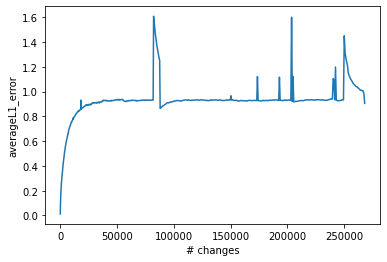

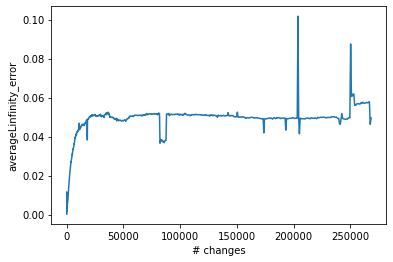

In [240]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)

# AS733

['as19971108.txt', 'as19971109.txt', 'as19971110.txt', 'as19971111.txt', 'as19971112.txt', 'as19971113.txt', 'as19971114.txt', 'as19971115.txt', 'as19971116.txt', 'as19971117.txt', 'as19971118.txt', 'as19971119.txt', 'as19971120.txt', 'as19971121.txt', 'as19971122.txt', 'as19971123.txt', 'as19971124.txt', 'as19971125.txt', 'as19971126.txt', 'as19971127.txt', 'as19971128.txt', 'as19971129.txt', 'as19971130.txt', 'as19971201.txt', 'as19971202.txt', 'as19971203.txt', 'as19971204.txt', 'as19971205.txt', 'as19971206.txt', 'as19971207.txt', 'as19971208.txt', 'as19971209.txt', 'as19971210.txt', 'as19971211.txt', 'as19971212.txt', 'as19971213.txt', 'as19971214.txt', 'as19971215.txt', 'as19971216.txt', 'as19971217.txt', 'as19971218.txt', 'as19971219.txt', 'as19971220.txt', 'as19971221.txt', 'as19971222.txt', 'as19971223.txt', 'as19971224.txt', 'as19971225.txt', 'as19971226.txt', 'as19971227.txt', 'as19971228.txt', 'as19971229.txt', 'as19971230.txt', 'as19971231.txt', 'as19980101.txt', 'as199801

['as19971108.txt',
 'as19971109.txt',
 'as19971110.txt',
 'as19971111.txt',
 'as19971112.txt',
 'as19971113.txt',
 'as19971114.txt',
 'as19971115.txt',
 'as19971116.txt',
 'as19971117.txt',
 'as19971118.txt',
 'as19971119.txt',
 'as19971120.txt',
 'as19971121.txt',
 'as19971122.txt',
 'as19971123.txt',
 'as19971124.txt',
 'as19971125.txt',
 'as19971126.txt',
 'as19971127.txt',
 'as19971128.txt',
 'as19971129.txt',
 'as19971130.txt',
 'as19971201.txt',
 'as19971202.txt',
 'as19971203.txt',
 'as19971204.txt',
 'as19971205.txt',
 'as19971206.txt',
 'as19971207.txt',
 'as19971208.txt',
 'as19971209.txt',
 'as19971210.txt',
 'as19971211.txt',
 'as19971212.txt',
 'as19971213.txt',
 'as19971214.txt',
 'as19971215.txt',
 'as19971216.txt',
 'as19971217.txt',
 'as19971218.txt',
 'as19971219.txt',
 'as19971220.txt',
 'as19971221.txt',
 'as19971222.txt',
 'as19971223.txt',
 'as19971224.txt',
 'as19971225.txt',
 'as19971226.txt',
 'as19971227.txt',
 'as19971228.txt',
 'as19971229.txt',
 'as19971230